## car-evaluation-model



In [1]:
# ---------------------------------------------
# 1. Import necessary libraries
# ---------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# ---------------------------------------------
# 2. Load and display dataset
# ---------------------------------------------
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', names=column_names)
print(df.head())


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [3]:
# ---------------------------------------------
# 3. Encode categorical features
# ---------------------------------------------
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


In [4]:
# ---------------------------------------------
# 4. Split data into features and target
# ---------------------------------------------
X = df.drop('class', axis=1)
y = df['class']


In [5]:
# ---------------------------------------------
# 5. Split into training and testing sets (stratified)
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# ---------------------------------------------
# 6. Handle class imbalance using SMOTE
# ---------------------------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(y_train_res.value_counts())  # Check new class distribution


class
0    968
2    968
1    968
3    968
Name: count, dtype: int64


In [7]:
# ---------------------------------------------
# 7. Train and evaluate Decision Tree
# ---------------------------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_res, y_train_res)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9595375722543352

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        77
           1       0.92      0.79      0.85        14
           2       0.98      0.99      0.98       242
           3       1.00      0.77      0.87        13

    accuracy                           0.96       346
   macro avg       0.95      0.87      0.90       346
weighted avg       0.96      0.96      0.96       346


Confusion Matrix:
 [[ 72   0   5   0]
 [  3  11   0   0]
 [  3   0 239   0]
 [  2   1   0  10]]


In [8]:
# ---------------------------------------------
# 8. Train and evaluate Random Forest
# ---------------------------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9682080924855492

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        77
           1       0.92      0.79      0.85        14
           2       1.00      0.98      0.99       242
           3       1.00      0.85      0.92        13

    accuracy                           0.97       346
   macro avg       0.95      0.90      0.92       346
weighted avg       0.97      0.97      0.97       346


Confusion Matrix:
 [[ 75   1   1   0]
 [  3  11   0   0]
 [  4   0 238   0]
 [  2   0   0  11]]


In [9]:
# ---------------------------------------------
# 9. Train and evaluate XGBoost
# ---------------------------------------------
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9797687861271677

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        77
           1       0.92      0.79      0.85        14
           2       1.00      0.99      1.00       242
           3       1.00      0.92      0.96        13

    accuracy                           0.98       346
   macro avg       0.96      0.92      0.94       346
weighted avg       0.98      0.98      0.98       346


Confusion Matrix:
 [[ 76   1   0   0]
 [  3  11   0   0]
 [  2   0 240   0]
 [  1   0   0  12]]


In [10]:
# ---------------------------------------------
# 10. Train and evaluate SVM
# ---------------------------------------------
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.9710982658959537

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        77
           1       0.93      1.00      0.97        14
           2       1.00      0.96      0.98       242
           3       1.00      1.00      1.00        13

    accuracy                           0.97       346
   macro avg       0.96      0.99      0.97       346
weighted avg       0.97      0.97      0.97       346


Confusion Matrix:
 [[ 76   1   0   0]
 [  0  14   0   0]
 [  9   0 233   0]
 [  0   0   0  13]]


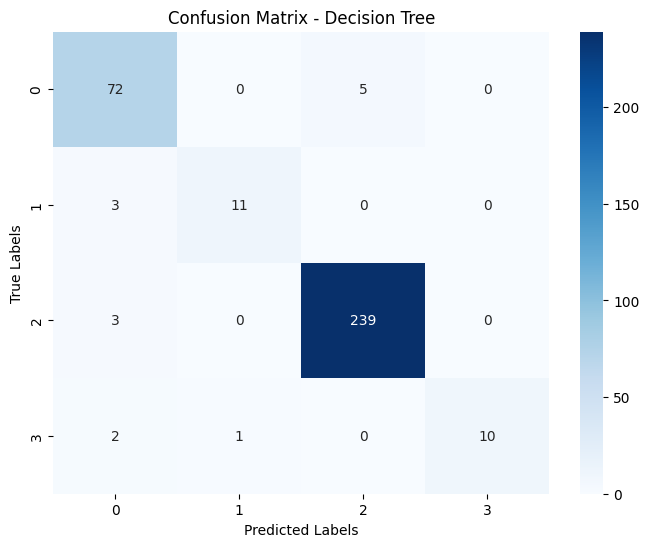

In [11]:
# ---------------------------------------------
# 11. Visualize confusion matrix (example: Decision Tree)
# ---------------------------------------------
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1', '2', '3'], 
            yticklabels=['0', '1', '2', '3'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [12]:
# ---------------------------------------------
# 12. Save models using Joblib
# ---------------------------------------------
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")


['svm_model.pkl']